## 17634 Applied Machine Learning -- HW1 -- MNIST Handwriting Classification
#### Author: Yi-Hsueh Yang

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import struct 
import gzip

### 1. Read in data

In [2]:
train_dataset = "train-images-idx3-ubyte.gz"

train_data = None

with gzip.open(train_dataset, 'rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    nrows, ncols = struct.unpack(">II", f.read(8))
    train_data = np.frombuffer(f.read(), dtype=np.dtype(np.uint8).newbyteorder('>'))
    train_data = train_data.reshape((size, nrows, ncols))

print(train_data.shape)

(60000, 28, 28)


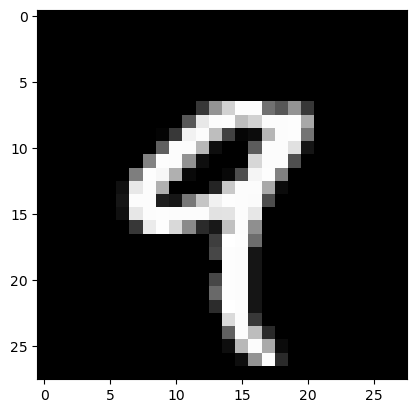

In [3]:
plt.imshow(train_data[4,:,:], cmap='gray')

In [4]:
train_label_dataset = "train-labels-idx1-ubyte"

with open(train_label_dataset, 'rb') as f:
    magic = struct.unpack(">I", f.read(4))[0]
    num_items = struct.unpack('>I', f.read(4))[0]
    train_label = [struct.unpack('B', f.read(1))[0] for i in range(num_items)]    

print(train_label[:10])
print(len(train_label))

[5, 0, 4, 1, 9, 2, 1, 3, 1, 4]
60000


In [5]:
test_dataset = "t10k-images-idx3-ubyte.gz"

test_data = None

with gzip.open(test_dataset, 'rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    nrows, ncols = struct.unpack(">II", f.read(8))
    test_data = np.frombuffer(f.read(), dtype=np.dtype(np.uint8).newbyteorder('>'))
    test_data = test_data.reshape((size, nrows, ncols))

print(test_data.shape)

(10000, 28, 28)


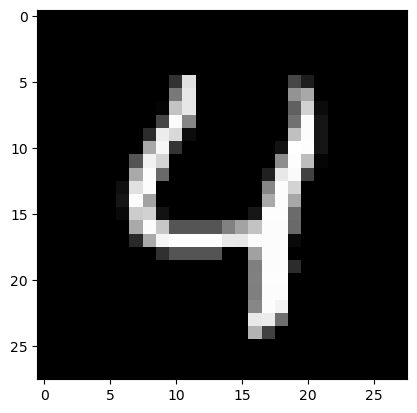

In [6]:
plt.imshow(test_data[4,:,:], cmap='gray')

In [7]:
test_label_dataset = "t10k-labels-idx1-ubyte"

with open(test_label_dataset, 'rb') as f:
    magic = struct.unpack(">I", f.read(4))[0]
    num_items = struct.unpack('>I', f.read(4))[0]
    test_label = [struct.unpack('B', f.read(1))[0] for i in range(num_items)]    

print(test_label[:10])
print(len(test_label))

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]
10000


### 2. Vectorizing data

In [8]:
train_data = train_data.reshape(60000, 784)
test_data = test_data.reshape(10000, 784)

#### Scaling the data

In [9]:
from sklearn.preprocessing import StandardScaler

### 3. Model Training -- Naive Bayes

In [10]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB(
    alpha=0.0,
    fit_prior=True,
    class_prior=None)

In [11]:
# balanced dataset
hist, bins = np.histogram(train_label, bins=np.linspace(0,10,11))
print(hist)

[5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


In [12]:
mnb.fit(train_data, train_label)
print('Multinomial Naive Bayes Model Initial Model Score:',mnb.score(train_data, train_label)) # train: 0.82575, test: 0.8369

Multinomial Naive Bayes Model Initial Model Score: 0.82575


/Users/alexyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:627: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/Users/alexyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


### 4. Model Training -- Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(
    penalty = None,
    class_weight = None,
    random_state = 0,
    solver = 'lbfgs',
    multi_class = 'multinomial',
    max_iter = 500
)

In [14]:
lr.fit(train_data, train_label)
print('Logistic Regression Model Initial Model Score:',lr.score(train_data, train_label)) # train: 0.9405833333, test: 0.9243

Logistic Regression Model Initial Model Score: 0.9405833333333333


/Users/alexyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(train_data, train_label)
pipe.score(train_data, train_label) # train: 0.94345 , test: 0.9246

/Users/alexyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.94345

### 5. Model Evaluation

In [16]:
lr_predicted_label = lr.predict(test_data)
lr_pipe_predicted_label = pipe.predict(test_data)
mnb_predicted_label = mnb.predict(test_data)

0.922


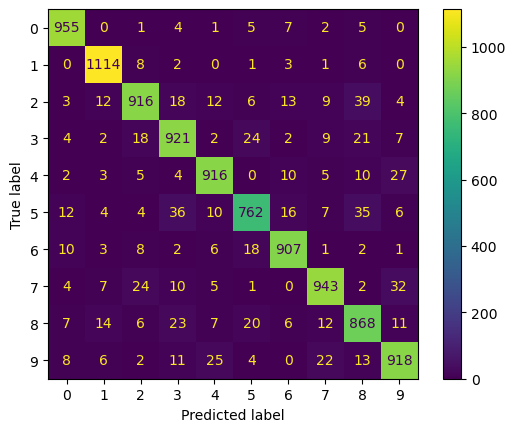

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score


lr_cm_test = confusion_matrix(test_label, lr_predicted_label)
lr_cm_display_test = ConfusionMatrixDisplay(lr_cm_test).plot()
print(accuracy_score(test_label, lr_predicted_label))

0.9246


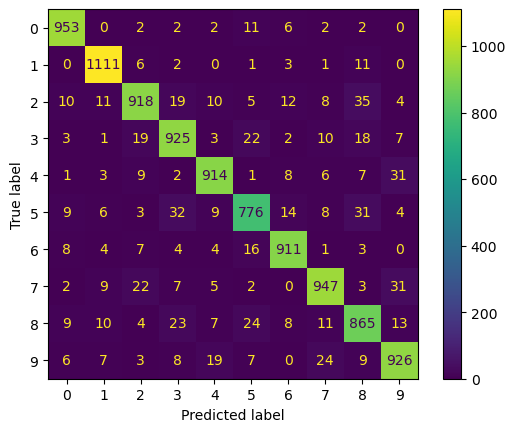

In [18]:
pipe_cm_test = confusion_matrix(test_label, lr_pipe_predicted_label)
pipe_cm_display_test = ConfusionMatrixDisplay(pipe_cm_test).plot()
print(accuracy_score(test_label, lr_pipe_predicted_label))

0.8369


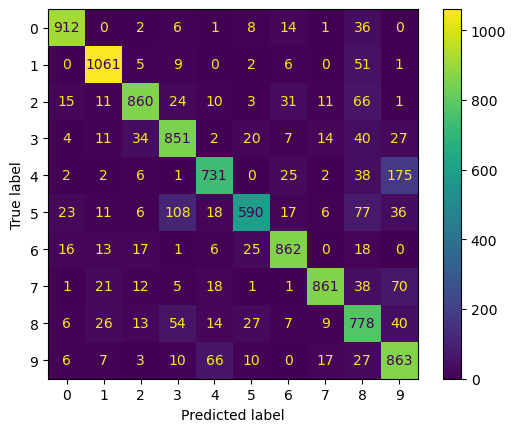

In [19]:
mnb_cm = confusion_matrix(test_label, mnb_predicted_label)
mnb_cm_display = ConfusionMatrixDisplay(mnb_cm).plot()
print(accuracy_score(test_label, mnb_predicted_label))

#### Model improvement

In [20]:
from sklearn.model_selection import cross_val_score

lr_pipe_score = cross_val_score(pipe, train_data, train_label, cv=10)

/Users/alexyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alexyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

In [21]:
print(f'Average lr model score after k-fold cross validation:, {lr_pipe_score.mean():.2%}')

Average lr model score after k-fold cross validation:, 91.48%


In [22]:
# grid-search for lr

from sklearn.model_selection import GridSearchCV

param_grid = [
	{'penalty': [None, 'l1', 'l2'], 'C': [10, 100], 'max_iter': [500, 800],
	 'solver': ['lbfgs']} #'newton-cg', 'newton-cholesky', 'sag', 'saga'
]

lr_search = GridSearchCV(lr, param_grid, cv=10, scoring='accuracy')  
lr_search.fit(train_data, train_label)

/Users/alexyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alexyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alexyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alexyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.

GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=500,
                                          multi_class='multinomial',
                                          penalty=None, random_state=0),
             param_grid=[{'C': [10, 100], 'max_iter': [500, 800],
                          'penalty': [None, 'l1', 'l2'], 'solver': ['lbfgs']}],
             scoring='accuracy')

In [ ]:
#{'penalty': [None, 'l2'], 'C': [100], 'max_iter': [500, 800],'solver': ['lbfgs']}
""" 0.009 (+/-0.835) for {'C': 100, 'max_iter': 500, 'penalty': None, 'solver': 'lbfgs'}
0.009 (+/-0.835) for {'C': 100, 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}
0.009 (+/-0.833) for {'C': 100, 'max_iter': 1000, 'penalty': None, 'solver': 'lbfgs'}
0.010 (+/-0.832) for {'C': 100, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'} """

In [23]:
for mean, std, params in zip(
	lr_search.cv_results_['std_test_score'], 
	lr_search.cv_results_['mean_test_score'],
	lr_search.cv_results_['params']):
	print(f'{mean:0.3f} (+/-{std ** 2:0.03f}) for {params}')

0.009 (+/-0.835) for {'C': 10, 'max_iter': 500, 'penalty': None, 'solver': 'lbfgs'}
nan (+/-nan) for {'C': 10, 'max_iter': 500, 'penalty': 'l1', 'solver': 'lbfgs'}
0.009 (+/-0.835) for {'C': 10, 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}
0.009 (+/-0.833) for {'C': 10, 'max_iter': 800, 'penalty': None, 'solver': 'lbfgs'}
nan (+/-nan) for {'C': 10, 'max_iter': 800, 'penalty': 'l1', 'solver': 'lbfgs'}
0.009 (+/-0.832) for {'C': 10, 'max_iter': 800, 'penalty': 'l2', 'solver': 'lbfgs'}
0.009 (+/-0.835) for {'C': 100, 'max_iter': 500, 'penalty': None, 'solver': 'lbfgs'}
nan (+/-nan) for {'C': 100, 'max_iter': 500, 'penalty': 'l1', 'solver': 'lbfgs'}
0.009 (+/-0.835) for {'C': 100, 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}
0.009 (+/-0.833) for {'C': 100, 'max_iter': 800, 'penalty': None, 'solver': 'lbfgs'}
nan (+/-nan) for {'C': 100, 'max_iter': 800, 'penalty': 'l1', 'solver': 'lbfgs'}
0.009 (+/-0.833) for {'C': 100, 'max_iter': 800, 'penalty': 'l2', 'solver': 'lbfgs'}


### 6. Write out model using pickle

In [22]:
import pickle

with open('lr_model.pkl', 'wb') as file:
    pickle.dump(pipe, file)
with open('nb_model.pkl', 'wb') as file:
    pickle.dump(mnb, file)

_Submission: model.ipynb, nb.model, lr.model, questions.txt_